# We Have AlexNet at Home

Exactly what the title says. We're making AlexNet from scratch.

## Getting Started

In [4]:
# General imports
import os
import cv2
import numpy as np
import pandas as pd

# Tensorflow imports
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.datasets.cifar10 import load_data

Tensorflow docs for `load_data` -> [here](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/cifar10/load_data)

In [5]:
# Load the CIFAR10 dataset
(X_train, y_train), (X_test, y_test) = load_data()

## Exploratory Data Analysis

In [6]:
# Check whether dataset has been loaded according to its expected size and shape

try:
  assert X_train.shape == (50000, 32, 32, 3)
  assert X_test.shape == (10000, 32, 32, 3)
  assert y_train.shape == (50000, 1)
  assert y_test.shape == (10000, 1)
finally:
  print("Dataset loaded as expected.")

Dataset loaded as expected.


In [7]:
# Inspect the first 10 items of y_train
y_train[:10]

array([[6],
       [9],
       [9],
       [4],
       [1],
       [1],
       [2],
       [7],
       [8],
       [3]], dtype=uint8)

array([[[154, 177, 187],
        [126, 137, 136],
        [105, 104,  95],
        ...,
        [ 91,  95,  71],
        [ 87,  90,  71],
        [ 79,  81,  70]],

       [[140, 160, 169],
        [145, 153, 154],
        [125, 125, 118],
        ...,
        [ 96,  99,  78],
        [ 77,  80,  62],
        [ 71,  73,  61]],

       [[140, 155, 164],
        [139, 146, 149],
        [115, 115, 112],
        ...,
        [ 79,  82,  64],
        [ 68,  70,  55],
        [ 67,  69,  55]],

       ...,

       [[175, 167, 166],
        [156, 154, 160],
        [154, 160, 170],
        ...,
        [ 42,  34,  36],
        [ 61,  53,  57],
        [ 93,  83,  91]],

       [[165, 154, 128],
        [156, 152, 130],
        [159, 161, 142],
        ...,
        [103,  93,  96],
        [123, 114, 120],
        [131, 121, 131]],

       [[163, 148, 120],
        [158, 148, 122],
        [163, 156, 133],
        ...,
        [143, 133, 139],
        [143, 134, 142],
        [143, 133, 144]]], dtype=uint8)
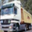

In [8]:
# Inspect the second item of X_train (second image in dataset)
X_train[1]

In [9]:
# Inspect the second item of y_train (label of second image in dataset)
y_train[1]

array([9], dtype=uint8)

## Data Preprocessing

Image resizing is not necessary here, as resizing layer will be added to head of the model instead.

In [10]:
# # Resize training images
# X_train_resized = tf.image.resize(X_train, [224, 224])
# X_test_resized = tf.image.resize(X_test, [224, 224])

# # Verify the new shapes
# try:
#   assert X_train_resized.shape == (50000, 224, 224, 3)
#   assert X_test_resized.shape == (10000, 224, 224, 3)
#   assert y_train.shape == (50000, 1)
#   assert y_test.shape == (10000, 1)
#   print("Images resized successfully to 224x224.")
# except AssertionError:
#   print("Resizing failed. Check shapes:",
#         X_train_resized.shape, X_test_resized.shape)

## Model Building

In [21]:
# Build the AlexNet model

model = keras.Sequential(
    [
        # RESIZING LAYER

        layers.Resizing(224, 224, input_shape=(32, 32, 3)),

        # CONVOLUTIONAL LAYERS

        layers.Conv2D(
            filters=96,
            kernel_size=(11, 11),
            strides=4,
            padding="same",
            activation="relu",
            input_shape=(224, 224, 3),
        ),
        layers.BatchNormalization(),
        layers.MaxPool2D(pool_size=3, strides=2),

        layers.Conv2D(
            filters=256,
            activation="relu",
            padding="same",
            kernel_size=(5, 5)),
        layers.BatchNormalization(),
        layers.MaxPool2D(pool_size=3, strides=2),

        layers.Conv2D(
            filters=384,
            activation="relu",
            padding="same",
            kernel_size=(3, 3),
        ),

        layers.Conv2D(
            filters=384,
            activation="relu",
            padding="same",
            kernel_size=(3, 3)),

        layers.Conv2D(
            filters=256,
            activation="relu",
            padding="same",
            kernel_size=(3, 3),
        ),
        layers.MaxPool2D(pool_size=3, strides=2),

        layers.Flatten(),

        # FULLY CONNECTED LAYERS

        layers.Dense(units=1024, activation="relu"),
        # layers.Dropout(rate=0.5),

        layers.Dense(units=1024, activation="relu"),
        # layers.Dropout(rate=0.5),

        layers.Dense(units=10, activation="softmax"),
    ]
)

model.summary()

/usr/local/lib/python3.11/dist-packages/keras/src/layers/preprocessing/tf_data_layer.py:19: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)
/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_2 (Resizing)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 56, 56, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 56, 56, 96)          │             384 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_8 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_16 (Conv2D)                   │ (None, 27, 27, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_3                │ (None, 27, 27, 256)         │           1,024 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_9 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_17 (Conv2D)                   │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_18 (Conv2D)                   │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_19 (Conv2D)                   │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_10 (MaxPooling2D)      │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_9 (Dense)                      │ (None, 1024)                │       9,438,208 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_10 (Dense)                     │ (None, 1024)                │       1,049,600 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_11 (Dense)                     │ (None, 10)                  │          10,250 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 14,246,666 (54.35 MB)

 Trainable params: 14,245,962 (54.34 MB)

 Non-trainable params: 704 (2.75 KB)

In [17]:
# Compile the model for training
model.compile(
    optimizer=keras.optimizers.SGD(
        learning_rate=0.00001,
        momentum=0.9,
        weight_decay=0.0005,
    ),
    loss=keras.losses.SparseCategoricalCrossentropy,
    metrics=[keras.metrics.Accuracy],
)

# NOTE
# SparseCategoricalCrossentropy is used instead of CategoricalCrossentropy
# when the classes are mutual exclusive, as is the case here.

In [22]:
# Simpler model compilation
model.compile(
    optimizer="SGD",
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"],
)

In [14]:
# Train the compiled model
model.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 64s 160ms/step - accuracy: 0.3570 - loss: 1.8086 - val_accuracy: 0.5026 - val_loss: 1.4039
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 57s 122ms/step - accuracy: 0.5601 - loss: 1.2429 - val_accuracy: 0.5474 - val_loss: 1.3119
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 37s 117ms/step - accuracy: 0.6400 - loss: 1.0268 - val_accuracy: 0.5214 - val_loss: 1.5035
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 125ms/step - accuracy: 0.6929 - loss: 0.8808 - val_accuracy: 0.6389 - val_loss: 1.0468
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 119ms/step - accuracy: 0.7340 - loss: 0.7624 - val_accuracy: 0.6654 - val_loss: 0.9679
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - accuracy: 0.7693 - loss: 0.6674 - val_accuracy: 0.6680 - val_loss: 0.9646
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 40s 127ms/step - accuracy: 0.8074 - loss: 0.5626 - val_accuracy: 0.7485 - val_loss: 0.7418
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.8321 - loss: 0

In [24]:
model.fit(
    X_train,
    y_train,
    epochs=15,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 36s 116ms/step - accuracy: 0.5518 - loss: 1.2560 - val_accuracy: 0.5031 - val_loss: 1.3632
Epoch 2/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 117ms/step - accuracy: 0.6394 - loss: 1.0283 - val_accuracy: 0.6266 - val_loss: 1.0660
Epoch 3/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 125ms/step - accuracy: 0.6962 - loss: 0.8786 - val_accuracy: 0.6404 - val_loss: 1.0468
Epoch 4/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 39s 119ms/step - accuracy: 0.7349 - loss: 0.7625 - val_accuracy: 0.5792 - val_loss: 1.2634
Epoch 5/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - accuracy: 0.7694 - loss: 0.6618 - val_accuracy: 0.5217 - val_loss: 1.5789
Epoch 6/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 120ms/step - accuracy: 0.8000 - loss: 0.5741 - val_accuracy: 0.5320 - val_loss: 1.4616
Epoch 7/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 43s 127ms/step - accuracy: 0.8312 - loss: 0.4930 - val_accuracy: 0.5597 - val_loss: 1.4153
Epoch 8/15
313/313 ━━━━━━━━━━━━━━━━━━━━ 41s 127ms/step - accuracy: 0.8595 - loss: 0

In [25]:
# Save the trained model
model.save("alexnet-at-home.keras")

In [18]:
newmodel = model
newmodel.compile(
    optimizer=keras.optimizers.SGD(
        learning_rate=0.00001,
        momentum=0.9,
        weight_decay=0.0005,
    ),
    loss=keras.losses.SparseCategoricalCrossentropy,
    metrics=[keras.metrics.Accuracy],
)

In [19]:
newmodel.fit(
    X_train,
    y_train,
    epochs=10,
    batch_size=128,
    validation_split=0.2,
)

Epoch 1/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 78ms/step - accuracy: 0.0000e+00 - loss: 2.3026 - val_accuracy: 0.0000e+00 - val_loss: 2.3026
Epoch 2/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 31s 63ms/step - accuracy: 0.0000e+00 - loss: 2.3026 - val_accuracy: 0.0000e+00 - val_loss: 2.3026
Epoch 3/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 21s 64ms/step - accuracy: 0.0000e+00 - loss: 2.3026 - val_accuracy: 0.0000e+00 - val_loss: 2.3026
Epoch 4/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 20s 61ms/step - accuracy: 0.0000e+00 - loss: 2.3026 - val_accuracy: 0.0000e+00 - val_loss: 2.3026
Epoch 5/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.0000e+00 - loss: 2.3026 - val_accuracy: 0.0000e+00 - val_loss: 2.3026
Epoch 6/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 19s 62ms/step - accuracy: 0.0000e+00 - loss: 2.3026 - val_accuracy: 0.0000e+00 - val_loss: 2.3026
Epoch 7/10
313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 65ms/step - accuracy: 0.0000e+00 - loss: 2.3026 - val_accuracy: 0.0000e+00 - val_loss: 2.3026
Epoch 8/10
313/313 ━━━━━━━━━━━━━━━

## Other Weird Implementations of AlexNet Found Online

In [15]:
def create_alexnet(input_shape=(227, 227, 3), num_classes=1000):
    model = keras.Sequential()
    model.add(layers.Conv2D(96, (11, 11), strides=(4, 4), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(256, (5, 5), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(384, (3, 3), activation='relu'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D(pool_size=(3, 3), strides=(2, 2)))
    model.add(layers.Flatten())
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes, activation='softmax'))
    return model

alexnet = create_alexnet()
alexnet.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_5 (Conv2D)                    │ (None, 55, 55, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_6 (Conv2D)                    │ (None, 23, 23, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_4 (MaxPooling2D)       │ (None, 11, 11, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_7 (Conv2D)                    │ (None, 9, 9, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_8 (Conv2D)                    │ (None, 7, 7, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_9 (Conv2D)                    │ (None, 5, 5, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_5 (MaxPooling2D)       │ (None, 2, 2, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_1 (Flatten)                  │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 4096)                │       4,198,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 1000)                │       4,097,000 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 28,823,912 (109.95 MB)

 Trainable params: 28,823,912 (109.95 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
model = keras.Sequential()

# RESIZING LAYER

model.add(layers.Resizing(224, 224, interpolation="bilinear", input_shape=X_train.shape[1:]))

# CONVOLUTIONAL LAYERS

model.add(layers.Conv2D(96, 11, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))

model.add(layers.Conv2D(256, 5, strides=4, padding='same'))
model.add(layers.Lambda(tf.nn.local_response_normalization))
model.add(layers.Activation('relu'))
model.add(layers.MaxPooling2D(3, strides=2))

model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(384, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Conv2D(256, 3, strides=4, padding='same'))
model.add(layers.Activation('relu'))

model.add(layers.Flatten())

# FULLY CONNECTED LAYERS

model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(4096, activation='relu'))
model.add(layers.Dropout(0.5))

model.add(layers.Dense(10, activation='softmax'))

# Get model summary
model.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ resizing_1 (Resizing)                │ (None, 224, 224, 3)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_10 (Conv2D)                   │ (None, 56, 56, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda (Lambda)                      │ (None, 56, 56, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation (Activation)              │ (None, 56, 56, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_6 (MaxPooling2D)       │ (None, 27, 27, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_11 (Conv2D)                   │ (None, 7, 7, 256)           │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lambda_1 (Lambda)                    │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_1 (Activation)            │ (None, 7, 7, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_7 (MaxPooling2D)       │ (None, 3, 3, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_12 (Conv2D)                   │ (None, 1, 1, 384)           │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_2 (Activation)            │ (None, 1, 1, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 1, 1, 384)           │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_3 (Activation)            │ (None, 1, 1, 384)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 1, 1, 256)           │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ activation_4 (Activation)            │ (None, 1, 1, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_2 (Flatten)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_6 (Dense)                      │ (None, 4096)                │       1,052,672 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_7 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_8 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴──────────────

 Total params: 21,622,154 (82.48 MB)

 Trainable params: 21,622,154 (82.48 MB)

 Non-trainable params: 0 (0.00 B)